# **Airbnb Hotel Booking Analysis**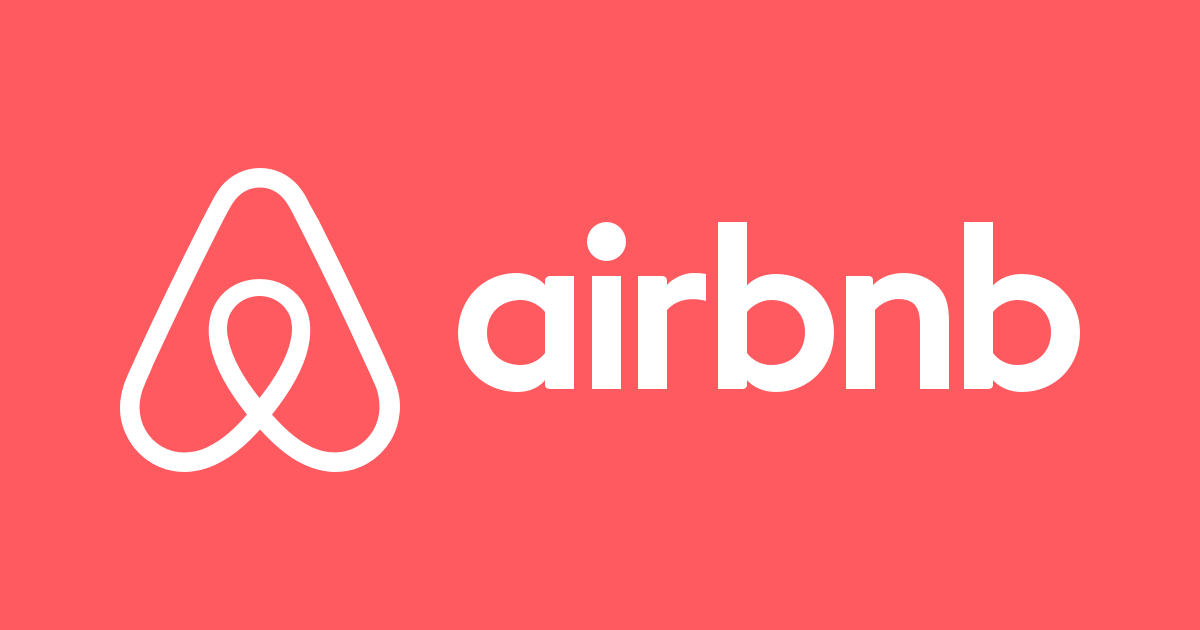

**Problem Statement:** Airbnb Hotel Booking Analysis.

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.bold text

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Read the AirBnb Data
with open('/content/1730285881-Airbnb_Open_Data.csv', 'r', encoding='latin1', errors='ignore') as f:
    df = pd.read_csv(f, low_memory=False)


In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10585 entries, 0 to 10584
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10585 non-null  int64  
 1   NAME                            10521 non-null  object 
 2   host id                         10585 non-null  int64  
 3   host_identity_verified          10490 non-null  object 
 4   host name                       10557 non-null  object 
 5   neighbourhood group             10558 non-null  object 
 6   neighbourhood                   10569 non-null  object 
 7   lat                             10577 non-null  float64
 8   long                            10577 non-null  float64
 9   country                         10535 non-null  object 
 10  country code                    10506 non-null  object 
 11  instant_bookable                10506 non-null  object 
 12  cancellation_policy             

In [5]:
df.duplicated().value_counts()

,count
False,10585


In [6]:
# Neighborhood group was 'brookln' instead of 'Brooklyn'
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [7]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# Drop house_rules and license columns only if they exist
df.drop([col for col in ['house_rules', 'license'] if col in df.columns],
        axis=1, inplace=True)

# Clean 'price' and 'service fee' columns only if they exist
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace('$', '', regex=False)
    df['price'] = df['price'].str.replace(',', '', regex=False)

if 'service fee' in df.columns:
    df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False)
    df['service fee'] = df['service fee'].str.replace(',', '', regex=False)

# Rename price and service fee columns if present
rename_map = {}
if 'price' in df.columns:
    rename_map['price'] = 'price_$'
if 'service fee' in df.columns:
    rename_map['service fee'] = 'service_fee_$'

if rename_map:
    df.rename(columns=rename_map, inplace=True)

# Drop all records with missing values
df.dropna(inplace=True)

# Change data types only if columns exist
if 'price_$' in df.columns:
    df['price_$'] = df['price_$'].astype(float)

if 'service_fee_$' in df.columns:
    df['service_fee_$'] = df['service_fee_$'].astype(float)

if 'id' in df.columns:
    df['id'] = df['id'].astype(str)

if 'host id' in df.columns:
    df['host id'] = df['host id'].astype(str)

if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

if 'construction year' in df.columns:
    df['construction year'] = pd.to_numeric(df['construction year'], errors='coerce').fillna(0).astype(int)

# Correct the Spelling of 'brookln' to 'Brooklyn'
if 'neighbourhood group' in df.columns:
    df.loc[df['neighbourhood group'].str.lower() == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Get rid of outliers in the 'availability 365' column data
if 'availability 365' in df.columns:
    df = df.drop(df[df['availability 365'] > 500].index)

print("Data cleaned successfully ✅")
print(df.head())

Data cleaned successfully ✅
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   
7  1005202                                   BlissArtsSpace!  90821839709   

  host_identity_verified host name neighbourhood group       neighbourhood  \
0            unconfirmed  Madaline            Brooklyn          Kensington   
1               verified     Jenna           Manhattan             Midtown   
4               verified    Lyndon           Manhattan         East Harlem   
5               verified  Michelle           Manhattan         Murray Hill   
7            unconfirmed      Emma            Brooklyn  Bedford-Stuyvesant   

        lat      long        country  ..

In [8]:
df.duplicated().value_counts()

,count
False,8589


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8589 entries, 0 to 10583
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              8589 non-null   object        
 1   NAME                            8589 non-null   object        
 2   host id                         8589 non-null   object        
 3   host_identity_verified          8589 non-null   object        
 4   host name                       8589 non-null   object        
 5   neighbourhood group             8589 non-null   object        
 6   neighbourhood                   8589 non-null   object        
 7   lat                             8589 non-null   float64       
 8   long                            8589 non-null   float64       
 9   country                         8589 non-null   object        
 10  country code                    8589 non-null   object        
 11  instant_

In [10]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,8589.000000,8589.000000,8589.000000,8570.000000,8568.000000,8589.000000,8589.000000,8589,8589.000000,8589.000000,8589.000000,8589.000000
mean,40.728626,-73.958122,2012.438468,621.374096,124.207166,7.929445,49.348469,2018-03-14 02:17:28.690184960,0.870035,3.008034,2.704622,208.497846
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688100,-73.983390,2008.000000,324.000000,65.000000,2.000000,5.000000,2016-10-22 00:00:00,0.110000,2.000000,1.000000,99.000000
50%,40.721680,-73.958470,2012.000000,620.000000,124.000000,3.000000,18.000000,2019-01-03 00:00:00,0.350000,3.000000,1.000000,210.000000
75%,40.763730,-73.942190,2017.000000,914.000000,183.000000,5.000000,66.000000,2019-06-17 00:00:00,1.180000,4.000000,2.000000,318.000000
max,40.908040,-73.729010,2022.000000,1200.000000,240.000000,1250.000000,607.000000,2022-05-21 00:00:00,13.450000,5.000000,121.000000,426.000000
std,0.052568,0.036617,5.759490,336.935320,67.354070,25.951724,68.858444,NaN,1.170562,1.423587,7.045180,125.876534


In [11]:
#What are the different property types in the Dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,5060
Private room,3418
Shared room,111


Text(0.5, 1.0, 'Property Types and their count in the Dataset')

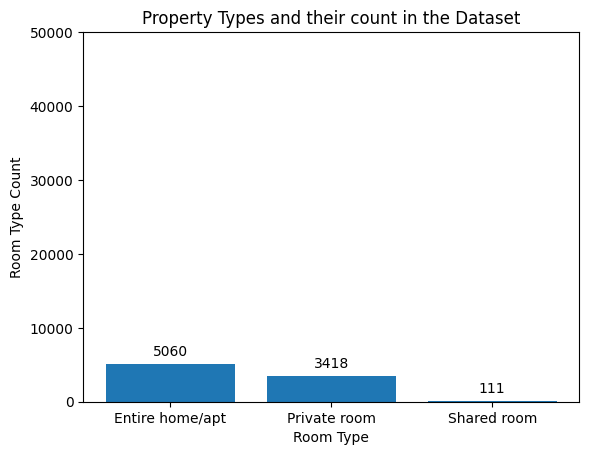

In [12]:
#Room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"] );
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"],padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset')

In [13]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,3885
Manhattan,3872
Queens,676
Bronx,118
Staten Island,38


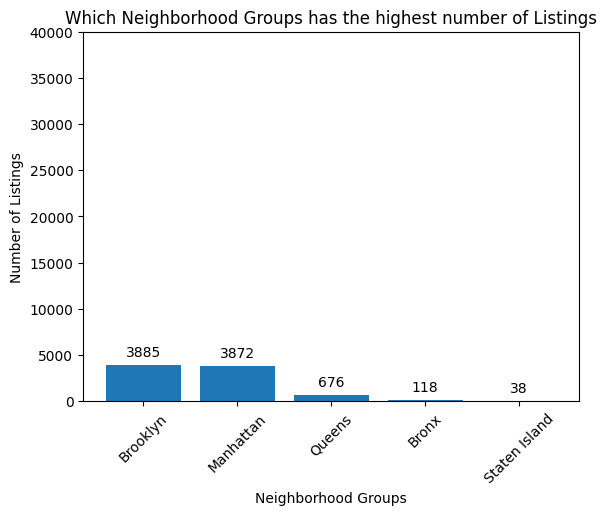

In [14]:
#Which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,"count"], padding = 4);
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('Which Neighborhood Groups has the highest number of Listings');

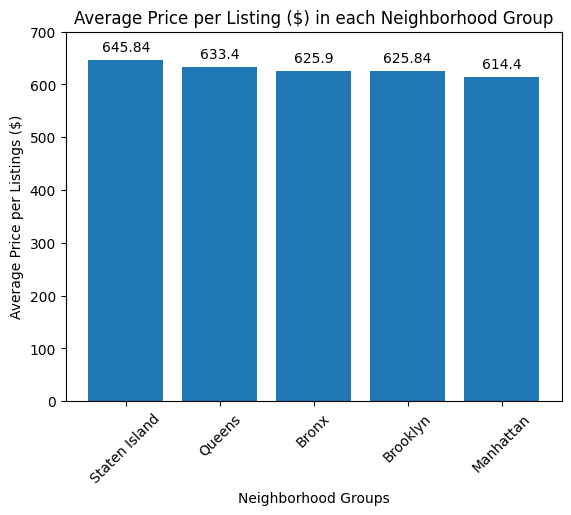

In [15]:
#Which neighborhood group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"], 2), label_type = 'edge', padding = 4);
plt.ylim([0,700]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listing ($) in each Neighborhood Group');

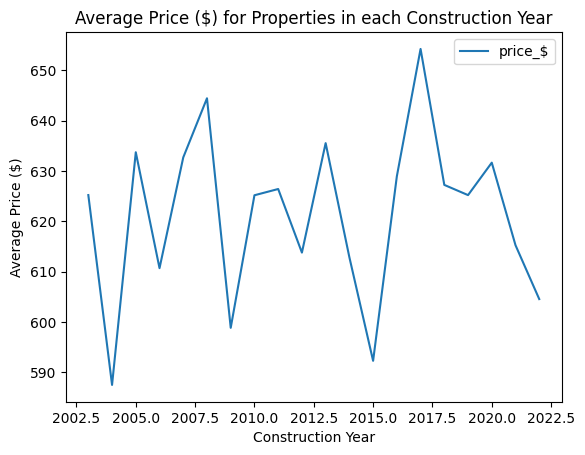

In [16]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

Columns available: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price_$', 'service_fee_$', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


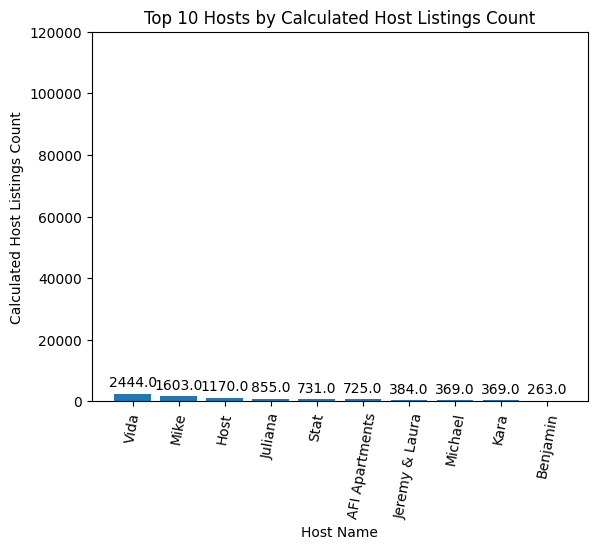

In [17]:
# Print all columns first
print("Columns available:", df.columns.tolist())
hosts = (
    df.groupby('host name')['calculated host listings count']
    .sum()
    .sort_values(ascending=False)
    .nlargest(10)
    .to_frame()
)

# Bar plot
hosts_bar = plt.bar(hosts.index, hosts['calculated host listings count'])
plt.bar_label(hosts_bar, labels=hosts['calculated host listings count'],
              label_type='edge', padding=3)

plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.show()

In [18]:
#Are hosts with verified identities more likely to receive position reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
unconfirmed,3.008124
verified,3.007942


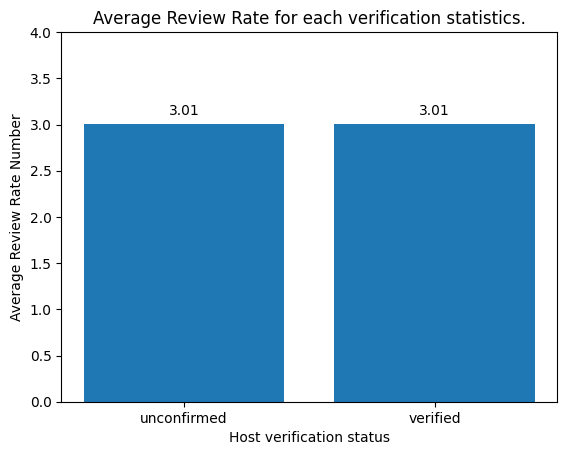

In [19]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host verification status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each verification statistics.');

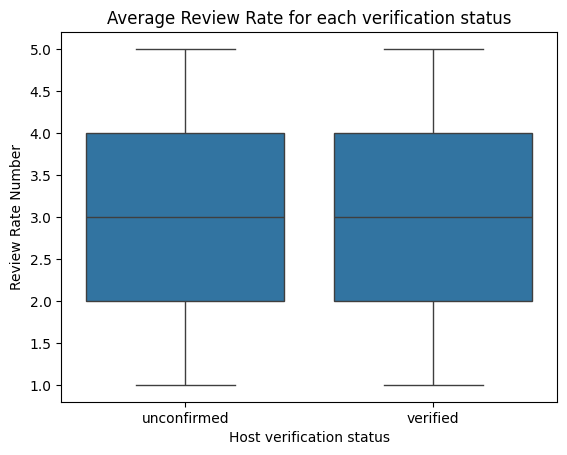

In [20]:
base_color = sns.color_palette()[0]

sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color)

plt.xlabel('Host verification status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each verification status')
plt.show()

In [21]:
#Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999913155564721)

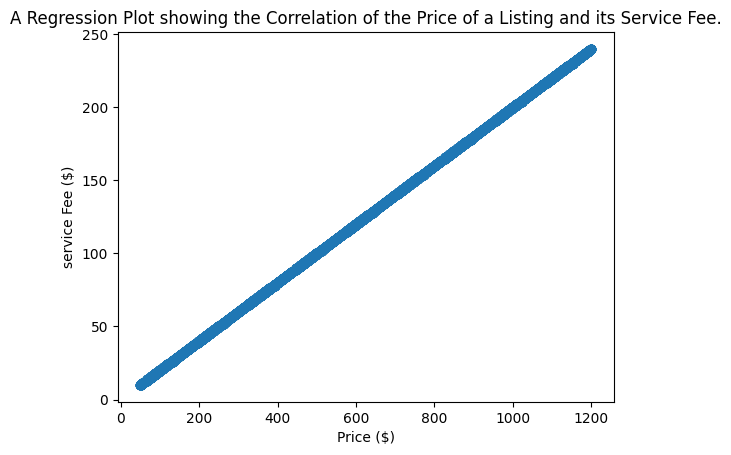

In [22]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

In [23]:
#What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            2.871795
                    Private room               2.973333
                    Shared room                2.000000
Brooklyn            Entire home/apt            2.975968
                    Private room               3.079701
                    Shared room                2.718750
Manhattan           Entire home/apt            3.023645
                    Private room               2.997788
                    Shared room                3.015873
Queens              Entire home/apt            2.853821
                    Private room               3.011019
                    Shared room                3.500000
Staten Island       Entire home/apt            3.050000
                    Private room               2.555556

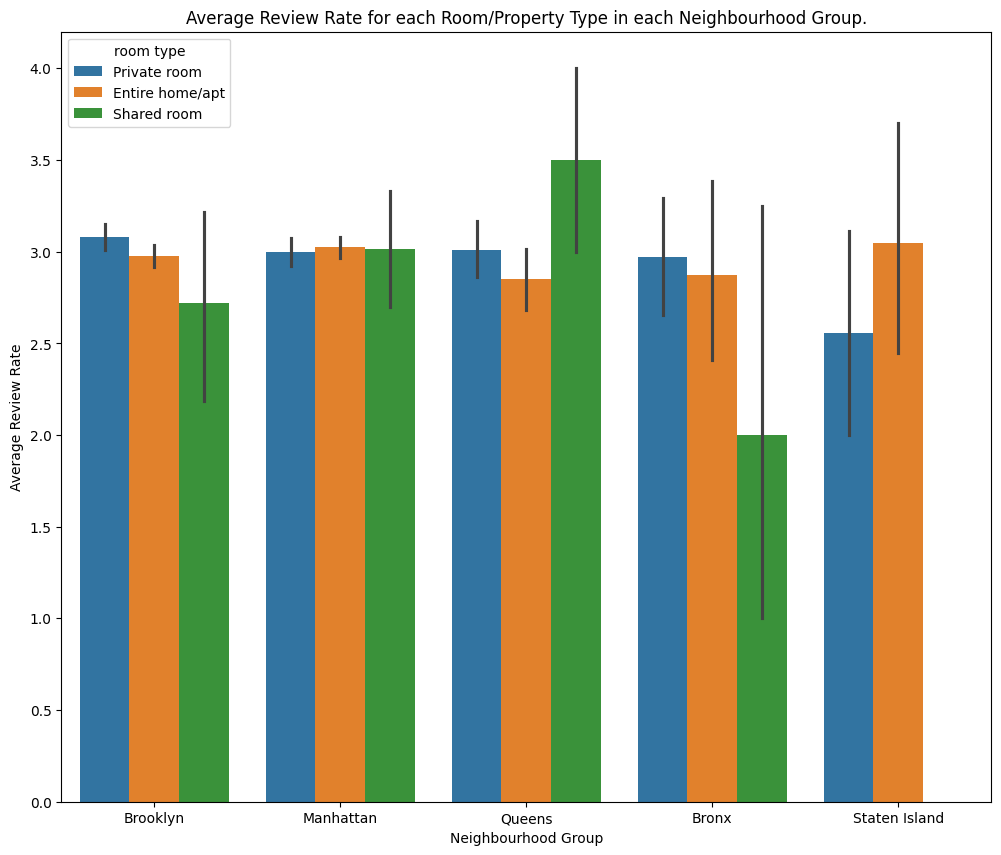

In [24]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type' );
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

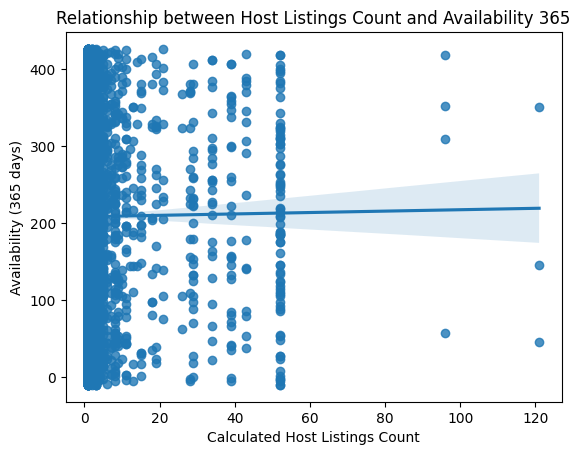

In [25]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(
    data=df,
    x='calculated host listings count',
    y='availability 365'
)
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability (365 days)')
plt.title('Relationship between Host Listings Count and Availability 365')
plt.show()



In [26]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.005086509854440751)